# 1. Import Librarys

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Preprocessing 

### 2.1 Read CSV file

In [77]:
main_df = pd.read_csv('garments_worker_productivity.csv')
main_df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,NaN,sweing,Saturday,8,NaN,23.54,1144.0,NaN,0,0.0,0,0,54.0,0.286985
1,NaN,sweing,Saturday,1,0.8,22.52,1534.0,6780.0,88,0.0,0,0,57.0,0.900136
2,Quarter1,finishing,NaN,7,0.8,4.60,NaN,NaN,0,0.0,0,0,8.0,0.342361
3,Quarter1,finishing,Wednesday,5,0.7,4.60,NaN,960.0,0,0.0,0,0,8.0,0.592083
4,Quarter5,sweing,Saturday,6,NaN,18.79,NaN,NaN,23,0.0,0,0,33.0,0.600711


### 2.2 Preprocess Data

In [78]:
main_df["quarter"].fillna("Quarter5",inplace = True)
main_df["department"].replace(to_replace = "finishing ", value = "finishing",inplace = True)
main_df.drop(axis = "rows",labels = main_df.index[main_df["day"].isna()],inplace = True)
main_df.drop(axis = "columns",labels = ["targeted_productivity","wip","idle_time","idle_men","department","day"],inplace = True)
main_df["over_time"].fillna(main_df["over_time"].mean(),inplace = True)
main_df = pd.get_dummies(main_df, columns = ["quarter"])


In [79]:
cols = ['team', 'smv', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5','actual_productivity']
main_df = main_df[cols]

In [80]:
main_df


,team,smv,over_time,incentive,no_of_style_change,no_of_workers,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,actual_productivity
0,8,23.54,4562.874763,0,0,54.0,0,0,0,0,1,0.286985
1,1,22.52,6780.000000,88,0,57.0,0,0,0,0,1,0.900136
3,5,4.60,960.000000,0,0,8.0,1,0,0,0,0,0.592083
4,6,18.79,4562.874763,23,0,33.0,0,0,0,0,1,0.600711
5,4,22.52,4562.874763,81,0,56.0,0,0,0,1,0,0.849984
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1,49.10,10350.000000,24,0,57.5,0,0,1,0,0,0.403242
1151,8,25.90,4562.874763,38,0,56.5,0,0,0,0,1,0.800684
1153,9,3.94,960.000000,0,0,8.0,0,0,1,0,0,0.586042
1156,5,27.48,4562.874763,40,0,58.0,0,0,0,0,1,0.700424


# 3. Univariate Linear Regression

### 3.1 Linear Regression code

In [81]:
class LinearRegression:
    def fit(self,X,y,iteration = 1,learning_rate = 1,opt = "Closed_form"):
        X = self._normalization(X)
        ones = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate((ones, X), axis = 1)
        self._samples,self._feature = X.shape
        self._itr = iteration
        self._lr = learning_rate
        if(opt == "Closed_form"):
            self._params = self._closed_form(X,y)
        elif(opt == "gradient"):
            self._params = self._gradient(X,y)
        elif(opt == "newton"):
            self._params = self._newton(X,y)
        
    def _closed_form(self,X,y):
        A = X.T @ X
        b = X.T @ y
        param = np.linalg.solve(A,b)
        return param
    
    def _gradient(self,X,y):
        param = np.random.randn(self._feature)
        self._MSE = [];
        self._MAE = [];
        for i in range(self._itr):
            self._MAE.append(np.sum(abs(y-(X @ param.T)))/len(y))
            self._MSE.append((y.T @ y - 2*(param @ X.T @ y) + param @ X.T @ X @ param.T)/len(y))
            gdt = (2/len(y))*(X.T @ X @ param.T - X.T @ y)
            param-= self._lr*gdt
        plt.plot(self._MAE)
        plt.title("MAE")
        plt.show()
        plt.plot(self._MSE)
        plt.title("MSE")
        plt.show()
        return param
        
    def _newton(self,X,y):
        param = np.random.randn(self._feature)
        self._MSE = [];
        self._MAE = [];
        for i in range(self._itr):
            self._MAE.append(np.sum(abs(y-(X @ param.T)))/len(y))
            self._MSE.append((y.T @ y - 2*(param @ X.T @ y) + param @ X.T @ X @ param.T)/len(y))
            gdt = (2/len(y))*(X.T @ X @ param.T - X.T @ y)
            H = (2/len(y))*(X.T @ X)
            param-= np.linalg.inv(H) @ gdt
        plt.plot(self._MAE)
        plt.title("MAE")
        plt.show()
        plt.plot(self._MSE)
        plt.title("MSE")
        plt.show()
        return param
        
    def _normalization(self,X):
        return ((X - X.min())/(X.max() - X.min()))
    
    
    def predict(self,X):
        X = self._normalization(X)
        ones = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate((ones, X), axis = 1)
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self,X):
        p = X @ self._params.T
        return p
    
    def Mean_Absolute_Error(self,y_test,y_pred):
        err = np.sum(abs(y_test-y_pred))/len(y_test)
        return err
    
    def Mean_Squared_Error(self,y_test,y_pred):
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        err = (y_test @ y_test.T -2*y_pred @ y_test.T +  y_pred @ y_pred.T)/len(y_test)
        return err


### 3.2 code for calling linear regrssion  class function

In [82]:
def Linear_Regression(df,l_rate=1,itr=1,opt = "Closed_form"):
    lr = LinearRegression()
    print("Univariate Linear Regrassion for each feture")
    columns = df.columns.values.tolist()
    for i in range(0,6):
        print("Feature : ",columns[i])
        X = np.array(df.iloc[:,i])
        X = X.reshape(-1,1)
        y = np.array(df.iloc[:,-1])
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=116)
        lr.fit(X_train,y_train,l_rate,itr,opt)
        y_pred = lr.predict(X_test)
        plt.scatter(X_test,y_test)
        plt.plot(X_test,y_pred,color='red')
        plt.title(columns[i])
        plt.show()
        print("Mean Absolute error : ",lr.Mean_Absolute_Error(y_test,y_pred))
        print("Mean Squared error : ",lr.Mean_Squared_Error(y_test,y_pred),)
        print()
    
    print("Multivariate Linear Regrassion")
    print("Features :",columns[0:6])
    X = np.array(df.iloc[:,0:6])
    y = np.array(df.iloc[:,-1])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=116)
    lr.fit(X_train,y_train,l_rate,itr,opt)
    y_pred = lr.predict(X_test)
    print("Mean Absolute error : ",lr.Mean_Absolute_Error(y_test,y_pred))
    print("Mean Squared error : ",lr.Mean_Squared_Error(y_test,y_pred))
    print()

    

    



Linear Regression using closed form
Univariate Linear Regrassion for each feture
Feature :  team


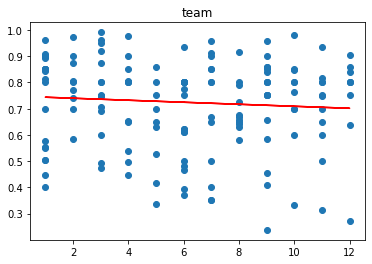

Mean Absolute error :  0.13884875446607015
Mean Squared error :  0.028926132611569344

Feature :  smv


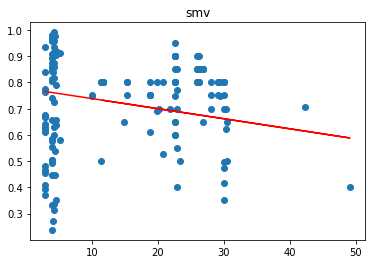

Mean Absolute error :  0.14662892684513273
Mean Squared error :  0.031752740627813206

Feature :  over_time


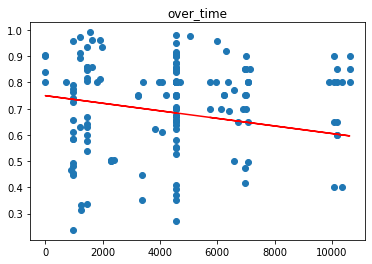

Mean Absolute error :  0.15262257724827996
Mean Squared error :  0.03263261498113898

Feature :  incentive


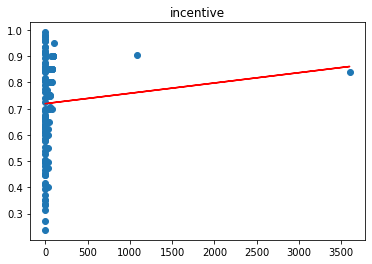

Mean Absolute error :  0.13829755106273361
Mean Squared error :  0.028754933198854995

Feature :  no_of_style_change


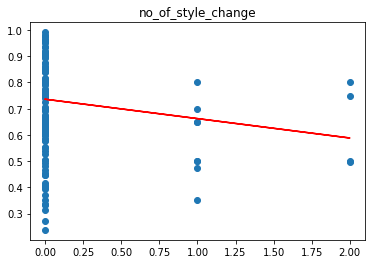

Mean Absolute error :  0.13461681859757452
Mean Squared error :  0.028286219886467914

Feature :  no_of_workers


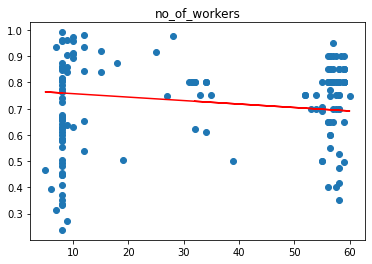

Mean Absolute error :  0.14481633848361086
Mean Squared error :  0.03161141614185192

Multivariate Linear Regrassion
Features : ['team', 'smv', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers']
Mean Absolute error :  0.1741457184936742
Mean Squared error :  0.041703527307293924



In [83]:
print("Linear Regression using closed form")
Linear_Regression(main_df,"Closed_form")

Linear Regression using gradient descent
Univariate Linear Regrassion for each feture
Feature :  team


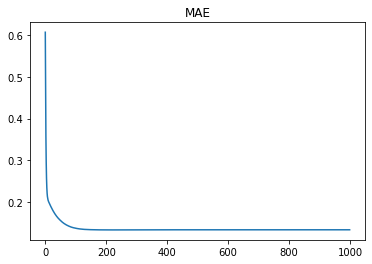

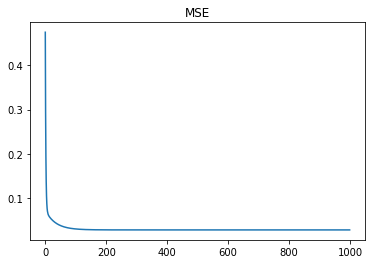

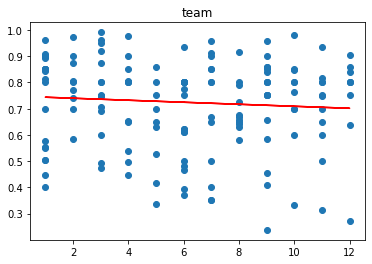

Mean Absolute error :  0.1388487510034627
Mean Squared error :  0.02892613273306989

Feature :  smv


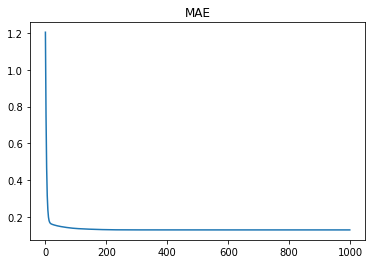

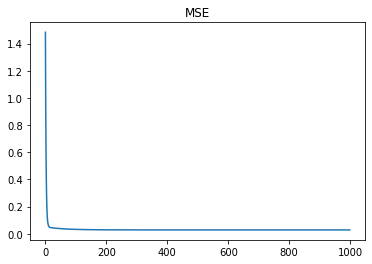

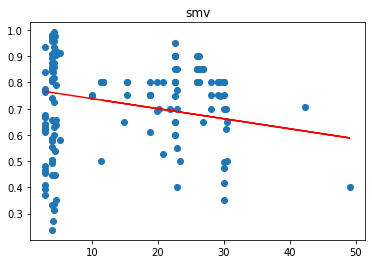

Mean Absolute error :  0.14662297072315586
Mean Squared error :  0.0317499712639913

Feature :  over_time


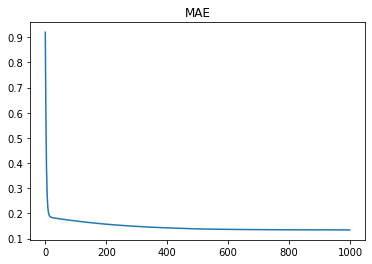

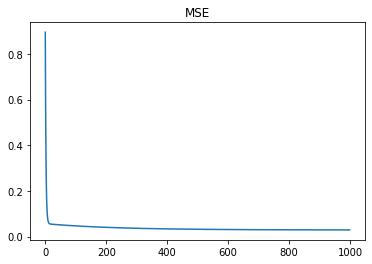

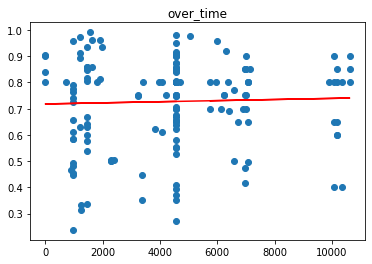

Mean Absolute error :  0.13814549228367232
Mean Squared error :  0.02905211159176104

Feature :  incentive


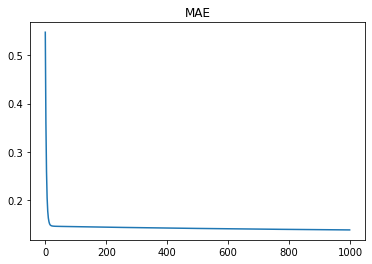

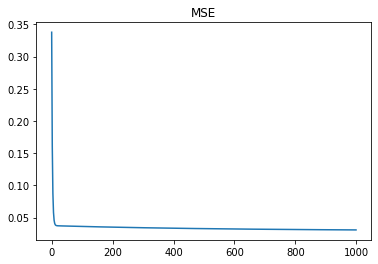

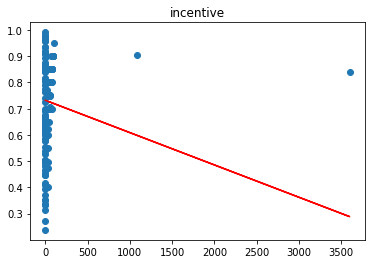

Mean Absolute error :  0.14347610722726117
Mean Squared error :  0.031941857584871114

Feature :  no_of_style_change


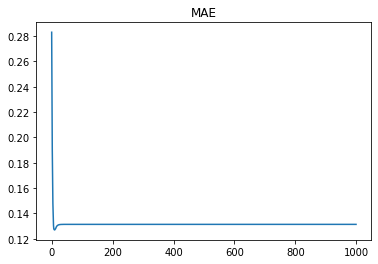

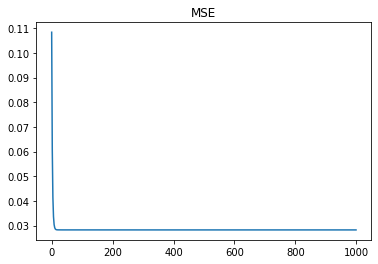

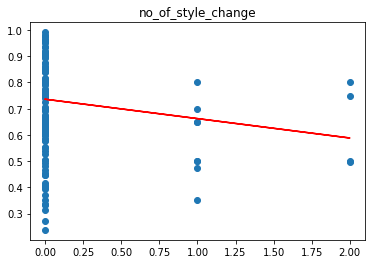

Mean Absolute error :  0.1346168292750482
Mean Squared error :  0.028286219838310676

Feature :  no_of_workers


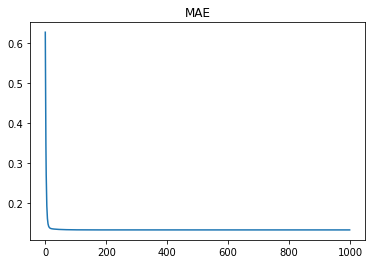

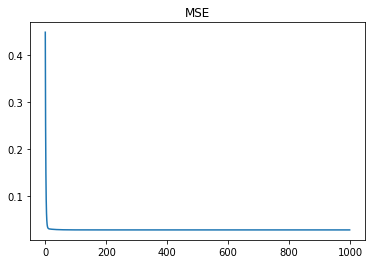

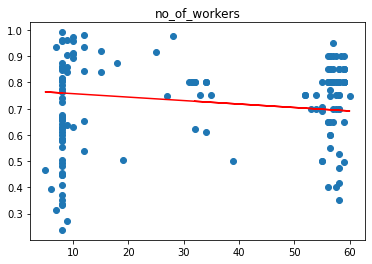

Mean Absolute error :  0.14481633849368825
Mean Squared error :  0.03161141614753029

Multivariate Linear Regrassion
Features : ['team', 'smv', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers']


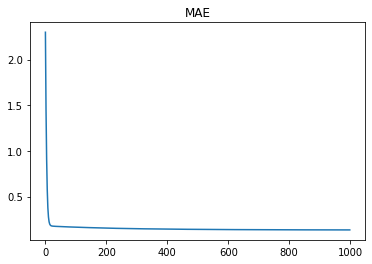

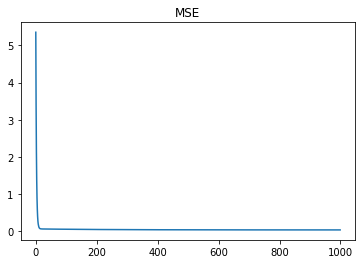

Mean Absolute error :  0.17778543119375095
Mean Squared error :  0.043105570518066946



In [84]:
print("Linear Regression using gradient descent")
Linear_Regression(main_df,1000,0.1,"gradient")

Linear Regression using newton's method
Univariate Linear Regrassion for each feture
Feature :  team


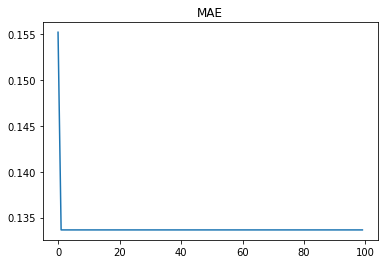

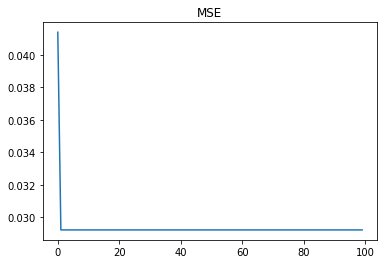

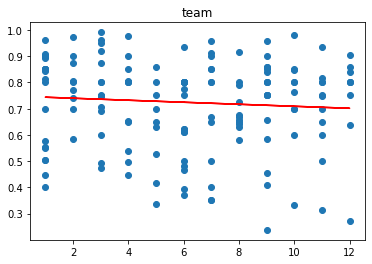

Mean Absolute error :  0.13884875446607017
Mean Squared error :  0.028926132611569434

Feature :  smv


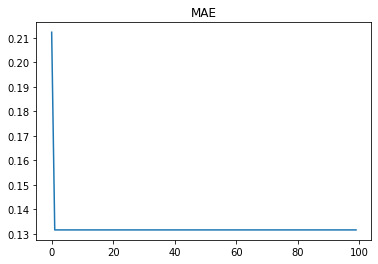

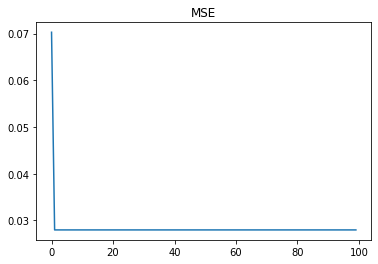

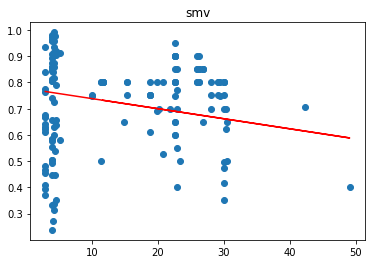

Mean Absolute error :  0.14662892684513273
Mean Squared error :  0.031752740627813206

Feature :  over_time


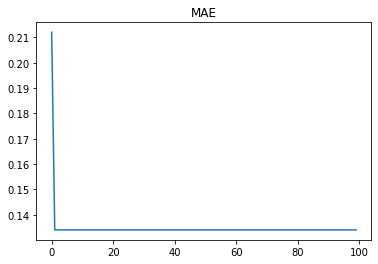

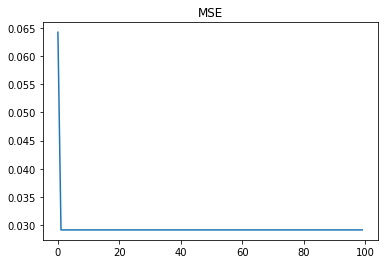

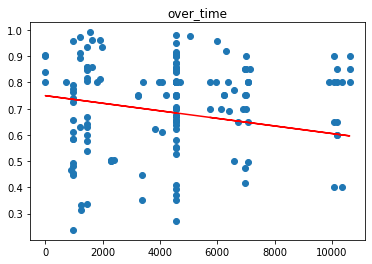

Mean Absolute error :  0.1526225772482799
Mean Squared error :  0.0326326149811388

Feature :  incentive


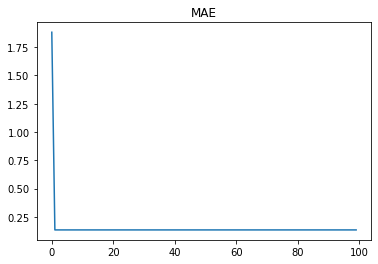

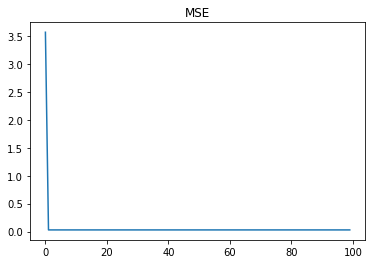

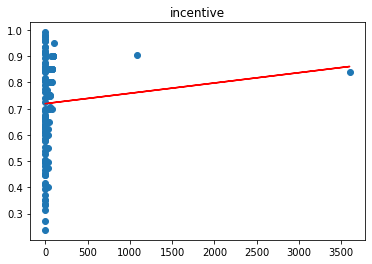

Mean Absolute error :  0.13829755106273361
Mean Squared error :  0.028754933198854905

Feature :  no_of_style_change


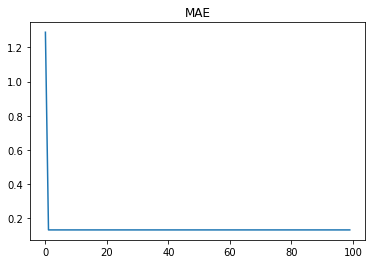

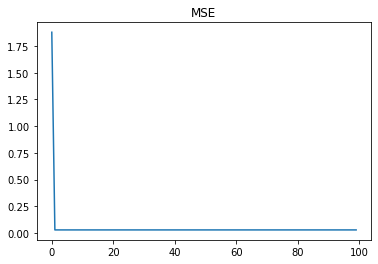

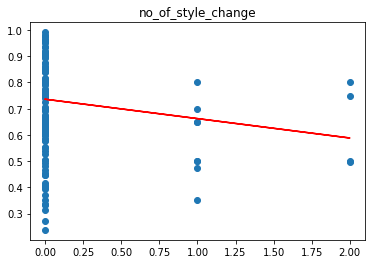

Mean Absolute error :  0.13461681859757452
Mean Squared error :  0.028286219886467914

Feature :  no_of_workers


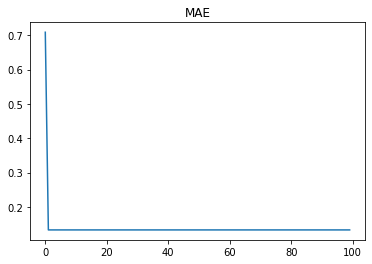

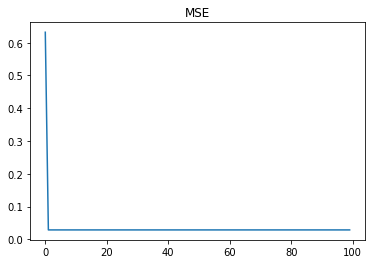

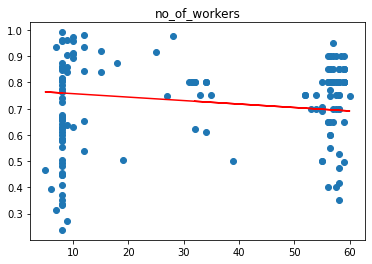

Mean Absolute error :  0.14481633848361086
Mean Squared error :  0.03161141614185174

Multivariate Linear Regrassion
Features : ['team', 'smv', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers']


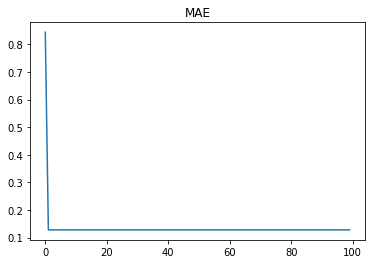

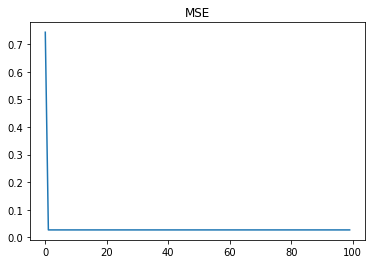

Mean Absolute error :  0.1741457184936738
Mean Squared error :  0.04170352730729365



In [85]:
print("Linear Regression using newton's method")
Linear_Regression(main_df,100,0.1,"newton")
